In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

In [10]:
folder_path = "/kaggle/input/utkface-new/UTKFace"

age = []
gender = []
img_path = []
for f in os.listdir(folder_path):
    age.append(int(f.split('_')[0]))
    gender.append(int(f.split('_')[1]))
    img_path.append(f)

In [11]:
df = pd.DataFrame({'age': age, 'gender': gender, 'img_path': img_path})

In [12]:
train_df = df.sample(frac = 1, random_state = 42).iloc[:20000]
test_df = df.sample(frac = 1, random_state = 42).iloc[20000:]

In [13]:
train_df.shape, test_df.shape

((20000, 3), (3708, 3))

In [14]:
train_datagen  = ImageDataGenerator(
    rescale = 1./255,
    zoom_range = 0.2,
    shear_range = 0.2,
    width_shift_range = 0.2,
    rotation_range = 30,
    height_shift_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
train_generator = train_datagen.flow_from_dataframe(train_df, directory = folder_path, 
                                                    x_col = 'img_path', y_col = ['age', 'gender'],
                                                   target_size = (200, 200),
                                                   class_mode = 'multi_output')
test_generator = test_datagen.flow_from_dataframe(test_df, directory = folder_path, 
                                                    x_col = 'img_path', y_col = ['age', 'gender'],
                                                   target_size = (200, 200),
                                                   class_mode = 'multi_output')

Found 20000 validated image filenames.
Found 3708 validated image filenames.


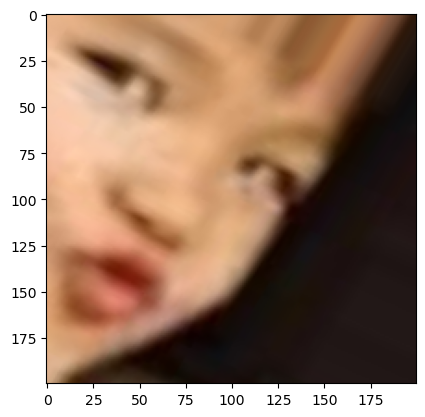

In [16]:
plt.imshow(train_generator[3][0][25])

In [ ]:
# for batch in train_generator:
#     images, labels = batch
#     for image in images:
#         plt.imshow(image)
#         break

In [17]:
from keras.applications.vgg16 import VGG16
from keras.layers import *
from keras.models import Model

In [18]:
vggnet = VGG16(include_top = False, input_shape = (200, 200, 3))
vggnet.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [19]:
output = vggnet.layers[-1].output

flatten = Flatten()(output)

dense1 = Dense(512, activation = 'relu')(flatten)
dense2 = Dense(512, activation = 'relu')(flatten)

dense3 = Dense(512, activation = 'relu')(dense1)
dense4 = Dense(512, activation = 'relu')(dense2)

output1 = Dense(1, activation = 'linear', name = 'age')(dense3)
output2 = Dense(1, activation = 'sigmoid', name = 'gender')(dense4)

In [20]:
model = Model(inputs = vggnet.input, outputs = [output1, output2])

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 200, 200, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 200, 200, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

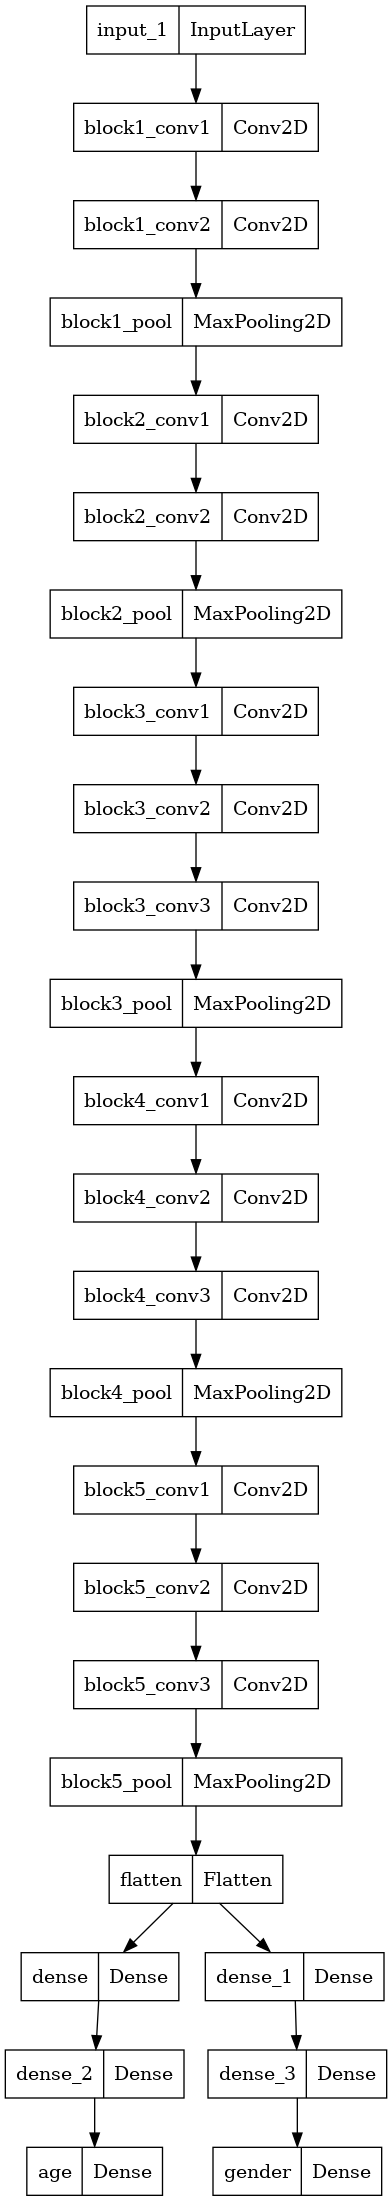

In [22]:
from keras.utils import plot_model
plot_model(model)

In [23]:
model.compile(optimizer = 'adam', loss = {'age': 'mae','gender':'binary_crossentropy'},
             metrics = {'age':'mae', 'gender':'accuracy'})
# loss_weights = {'age':1, 'gender':99}

In [24]:
history = model.fit(train_generator, epochs = 7, validation_data = test_generator)

Epoch 1/7
625/625 [==============================] - 333s 511ms/step - loss: 11.3932 - age_loss: 10.8689 - gender_loss: 0.5244 - age_mae: 10.8689 - gender_accuracy: 0.7445 - val_loss: 9.1944 - val_age_loss: 8.8435 - val_gender_loss: 0.3509 - val_age_mae: 8.8435 - val_gender_accuracy: 0.8417
Epoch 2/7
625/625 [==============================] - 243s 388ms/step - loss: 9.7991 - age_loss: 9.3583 - gender_loss: 0.4408 - age_mae: 9.3583 - gender_accuracy: 0.7908 - val_loss: 10.6159 - val_age_loss: 10.2592 - val_gender_loss: 0.3568 - val_age_mae: 10.2592 - val_gender_accuracy: 0.8320
Epoch 3/7
625/625 [==============================] - 236s 377ms/step - loss: 9.4641 - age_loss: 9.0468 - gender_loss: 0.4172 - age_mae: 9.0468 - gender_accuracy: 0.8061 - val_loss: 8.9375 - val_age_loss: 8.6068 - val_gender_loss: 0.3307 - val_age_mae: 8.6068 - val_gender_accuracy: 0.8501
Epoch 4/7
625/625 [==============================] - 238s 380ms/step - loss: 9.2256 - age_loss: 8.8180 - gender_loss: 0.4075 - 

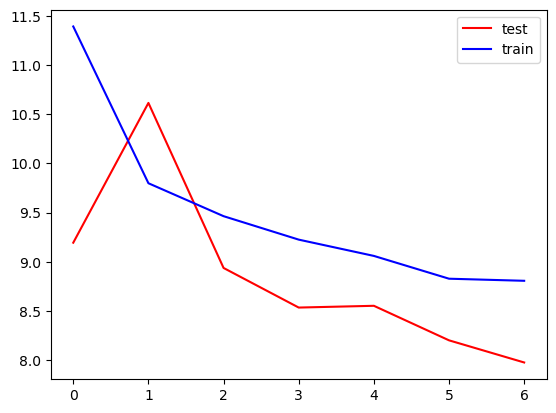

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_loss'], color = 'red', label = "test")
plt.plot(history.history['loss'], color = 'blue', label = "train")
plt.legend()

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'], color = 'red', label = "test")
plt.plot(history.history['accuracy'], color = 'blue', label = "train")
plt.legend()

KeyError: 'val_accuracy'

In [ ]:
from keras.utils import load_img, img_to_array

In [ ]:
path = "/kaggle/input/utkface-new/UTKFace/10_0_0_20170104013211746.jpg.chip.jpg"
img = load_img(path, target_size = (200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x.shape

In [ ]:
print(model.predict(x))
img